In [1]:
from hydrology import FrequencyAnalysis as fqa
# ! not finished

In [2]:
years = list(range(1941,1960+1))
discharges = [22.1, 26.1, 79.9, 164, 294, 
405, 60.3, 177, 221, 541,
88.6, 309, 71.9, 878, 39.1,
255, 22.4, 26.7, 521, 62.6]
ffqa = fqa.FrequencyAnalysis(years, discharges, type='Australia')
ffqa.table

,year,discharge,rank,P
0,1941,22.1,20,0.970297
1,1942,26.1,18,0.871287
2,1943,79.9,12,0.574257
3,1944,164.0,10,0.475248
4,1945,294.0,6,0.277228
5,1946,405.0,4,0.178218
6,1947,60.3,15,0.722772
7,1948,177.0,9,0.425743
8,1949,221.0,8,0.376238
9,1950,541.0,2,0.079208


In [9]:
ffqa.table.sort_values(by='rank')

,year,discharge,rank,P
13,1954,878.0,1,0.029703
9,1950,541.0,2,0.079208
18,1959,521.0,3,0.128713
5,1946,405.0,4,0.178218
11,1952,309.0,5,0.227723
4,1945,294.0,6,0.277228
15,1956,255.0,7,0.326733
8,1949,221.0,8,0.376238
7,1948,177.0,9,0.425743
3,1944,164.0,10,0.475248


In [3]:
res = ffqa.fit()
ffqa.estimate_discharge(0.97), ffqa.estimate_discharge(0.03)


48726.363157786174


(213.2352409846593, 213.23511933233408)

In [4]:
res.message, res.x

(['requested number of basinhopping iterations completed successfully'],
 array([   52.99224604,   809.94133218, 15810.40122286]))

In [5]:
from scipy.stats import pearson3
skew, loc, scale = res.x
[pearson3.ppf(probbility, skew, loc=loc, scale=scale)
for probbility in ffqa.table['P']]


[213.23527015604475,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408,
 213.23511933233408]

In [6]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
mean, var, skew, kurt = norm.stats(moments='mvsk')
mean, var, skew, kurt


(array(0.), array(1.), array(0.), array(0.))

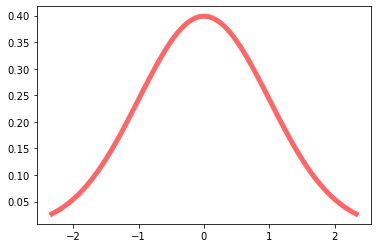

In [7]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')


In [8]:
x[0], x[-1]

(-2.3263478740408408, 2.3263478740408408)